In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Read in cleaned csv's for visualizations
whr_wdi_left = pd.read_csv('../data/whr_wdi_left_merge.csv')
left_wide = pd.read_csv('../data/whr_wdi_left_merge_wide.csv')
left_wide_advanced = pd.read_csv('../data/whr_wdi_left_merge_wide_advanced.csv')

print('CSVs read in successfully')

CSVs read in successfully


In [3]:
# Check data
print(whr_wdi_left.shape)
whr_wdi_left.head()

(14533, 15)


,Iso3,Country,Year,Happiness Rank,Happiness Score,GDP Contribution,Life Expectancy Contribution,Corruption Impact,series_name,value,Income Level,Region,longitude,latitude,iso2Code
0,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,GDP per capita (current US$),606.69,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
1,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,Current health expenditure per capita (current...,52.19,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
2,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,Current health expenditure (% of GDP),8.56,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
3,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,"Government expenditure on education, total (% ...",3.46,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF
4,AFG,Afghanistan,2011,131,4.258,NaN,NaN,NaN,"Literacy rate, adult total (% of people ages 1...",31.45,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228,AF


In [4]:
print(left_wide.shape)
left_wide.head()

(1794, 17)


,Iso3,Country,Year,Happiness Rank,Happiness Score,Health Expenditure (% GDP),Health Expenditure (per capita),GDP per Capita,Education Expenditure (% GDP),Adult Literacy %,Primary School Enrollment %,Secondary School Enrollment %,Tertiary School Enrollment %,Income Level,Region,longitude,latitude
0,AFG,Afghanistan,2011,131,4.258,8.56,52.19,606.69,3.46,31.45,101.54,52.45,3.69,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
1,AFG,Afghanistan,2012,143,4.040,7.90,52.45,651.42,2.60,NaN,106.58,54.37,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
2,AFG,Afghanistan,2014,153,3.575,9.53,60.05,625.05,3.70,NaN,109.83,54.29,8.40,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
3,AFG,Afghanistan,2015,153,3.360,10.11,59.92,565.57,3.26,33.75,106.77,53.15,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
4,AFG,Afghanistan,2016,141,3.794,11.82,61.37,522.08,4.54,NaN,106.78,53.44,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228


In [5]:
# Check data
print(left_wide_advanced.shape)
left_wide_advanced.head()

(795, 20)


,Iso3,Country,Year,Happiness Rank,Happiness Score,GDP Contribution,Life Expectancy Contribution,Corruption Impact,Health Expenditure (% GDP),Health Expenditure (per capita),GDP per Capita,Education Expenditure (% GDP),Adult Literacy %,Primary School Enrollment %,Secondary School Enrollment %,Tertiary School Enrollment %,Income Level,Region,longitude,latitude
0,AFG,Afghanistan,2019,153,2.567,0.301,0.266,0.001,14.83,74.06,496.60,NaN,NaN,109.08,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
1,AFG,Afghanistan,2020,149,2.523,0.370,0.126,0.010,15.53,80.09,510.79,NaN,35.99,NaN,NaN,10.85,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
2,AFG,Afghanistan,2021,146,2.404,0.758,0.289,0.005,21.51,81.52,356.50,NaN,37.27,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
3,AFG,Afghanistan,2022,137,1.859,0.645,0.087,0.059,23.09,80.65,357.26,NaN,NaN,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228
4,AFG,Afghanistan,2023,143,1.721,0.628,0.242,0.088,NaN,NaN,413.76,NaN,NaN,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan",69.1761,34.5228


🌍 Step 1 – Global Overview: Where Are the Happiest Countries? -- Purpose: Show the big picture first.This is your opening visual. It sets the stage by showing which countries are happiest. ✅ Explanation: This is your opening visual. It sets the stage by showing which countries are happiest.
It answers: “Where is happiness concentrated globally?”

In [6]:
# Choropleth map using Plotly
fig = px.choropleth(
    whr_wdi_left,
    locations='Country',
    locationmode='country names',
    color='Happiness Score',
    #color_continuous_scale='Viridis_r',
    color_continuous_scale='Viridis',
    title='Global Happiness'
)

# Make the layout bigger and remove unnecessary gaps
fig.update_layout(
    width=1000,
    height=600,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title='Happiness Score'
    )
)

fig.show()

C:\Users\Newforce\AppData\Local\Temp\ipykernel_36580\1478032602.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


💰 Step 2 – Wealth vs Happiness -- Purpose: Show that richer countries tend to be happier. ✅ Explanation: This simple scatterplot reveals the general upward trend: countries with higher GDP per person tend to report higher happiness.

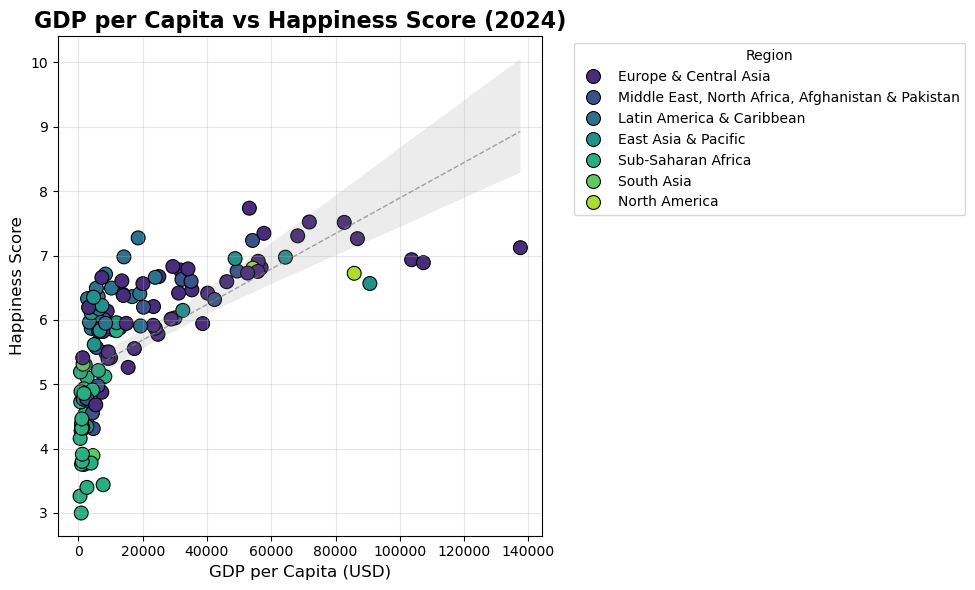

In [7]:
# Filter single year
df_gdp_2024 = left_wide[left_wide['Year'] == 2024]

# Scatterplot gdp vs happiness
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_gdp_2024,
    x='GDP per Capita',
    y='Happiness Score',
    hue='Region',
    s=100,
    palette='viridis',
    edgecolor='black'
)

# Add a trendline
sns.regplot(
    data=df_gdp_2024,
    x='GDP per Capita',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Titles and labels
plt.title('GDP per Capita vs Happiness Score (2024)', fontsize=16, weight='bold')
plt.xlabel('GDP per Capita (USD)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

Log scale GDP vs Happiness 2024

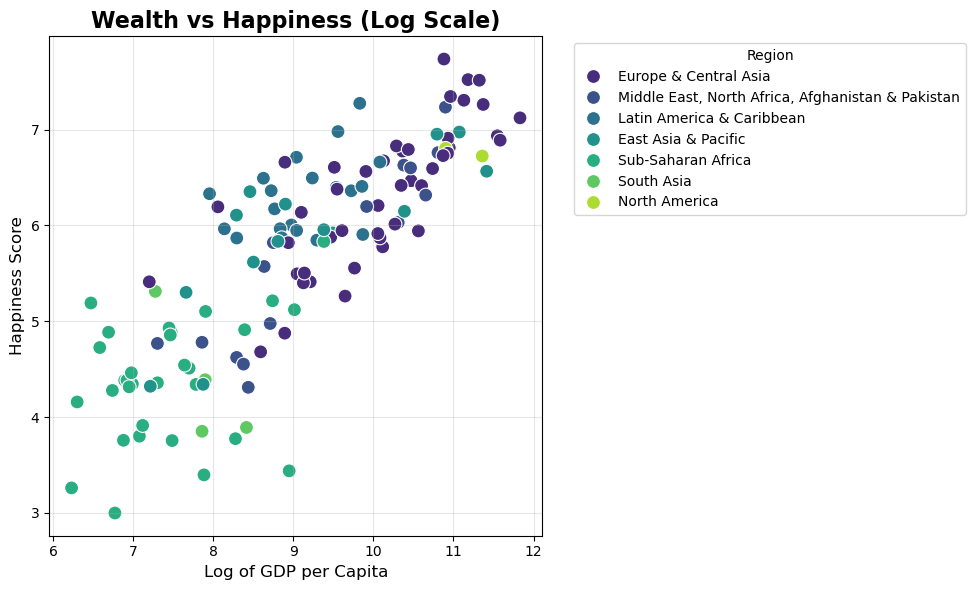

In [8]:
# Log scale gdp vs happiness
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_gdp_2024, x=np.log(df_gdp_2024['GDP per Capita']), y='Happiness Score',
                hue='Region',
                s=100,
                palette='viridis'
)

# Titles and labels
plt.title('Wealth vs Happiness (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Log of GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

📉 Step 3 – Diminishing Returns of Money -- Purpose: Show that after a certain point, more money doesn’t equal more happiness. ✅ Explanation: This line will rise and then flatten — showing where happiness growth slows with income.

C:\Users\Newforce\AppData\Local\Temp\ipykernel_36580\2077237060.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



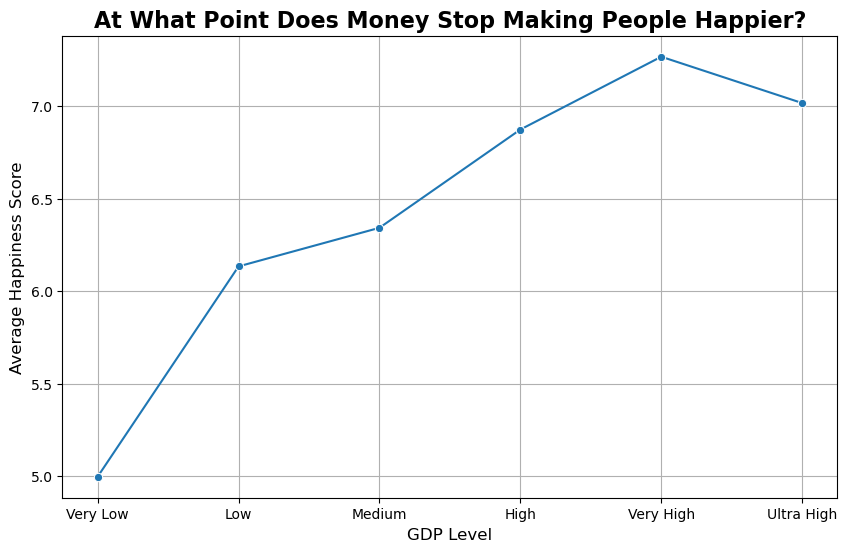

In [9]:
# Create GDP bins (if not already created)
df_gdp_2024['GDP_bins'] = pd.cut(df_gdp_2024['GDP per Capita'], 
                        bins=[0, 10000, 20000, 40000, 60000, 80000, 100000], 
                        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra High'])

# Group by those bins and calculate mean happiness
avg_gdp = df_gdp_2024.groupby('GDP_bins', observed=False)['Happiness Score'].mean().reset_index()

# Make sure the bins are ordered correctly (so the line connects left to right)
avg_gdp['GDP_bins'] = pd.Categorical(avg_gdp['GDP_bins'], 
                                     categories=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra High'], 
                                     ordered=True)

# Show plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_gdp, x='GDP_bins', y='Happiness Score', marker='o')
plt.title('At What Point Does Money Stop Making People Happier?', fontsize=16, weight='bold')
plt.xlabel('GDP Level', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.grid(True)

plt.show()

🧬 Step 4 – Health and Education vs Happiness -- Purpose: Compare how other factors (besides money) affect happiness. 
✅ Explanation: These show how happiness increases with better health and education — you’ll usually see a positive, fairly linear trend.

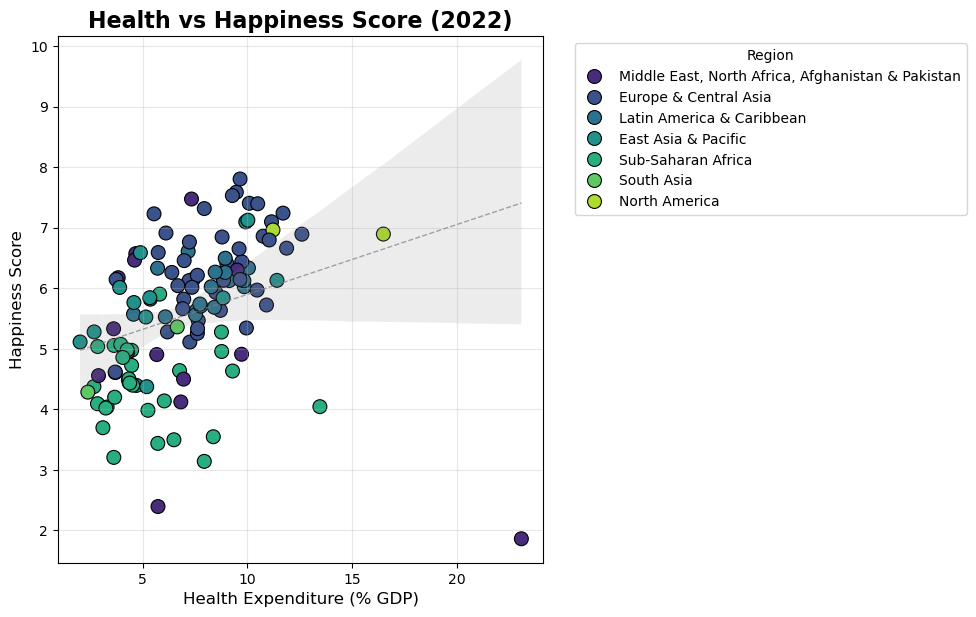

In [10]:
# Filter for 2022 (2024 has no data)
df_health_2022 = left_wide[left_wide['Year'] == 2022]

# Scatterplot health expenditure vs happiness
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_health_2022, x='Health Expenditure (% GDP)', y='Happiness Score',
                 hue='Region',
                 s=100,
                 palette='viridis',
                 edgecolor='black'
)

# Add a trendline
sns.regplot(
    data=df_health_2022,
    x='Health Expenditure (% GDP)',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Titles and labels
plt.title('Health vs Happiness Score (2022)', fontsize=16, weight='bold')
plt.xlabel('Health Expenditure (% GDP)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Education (Adult Literacy %) vs Happiness 2021

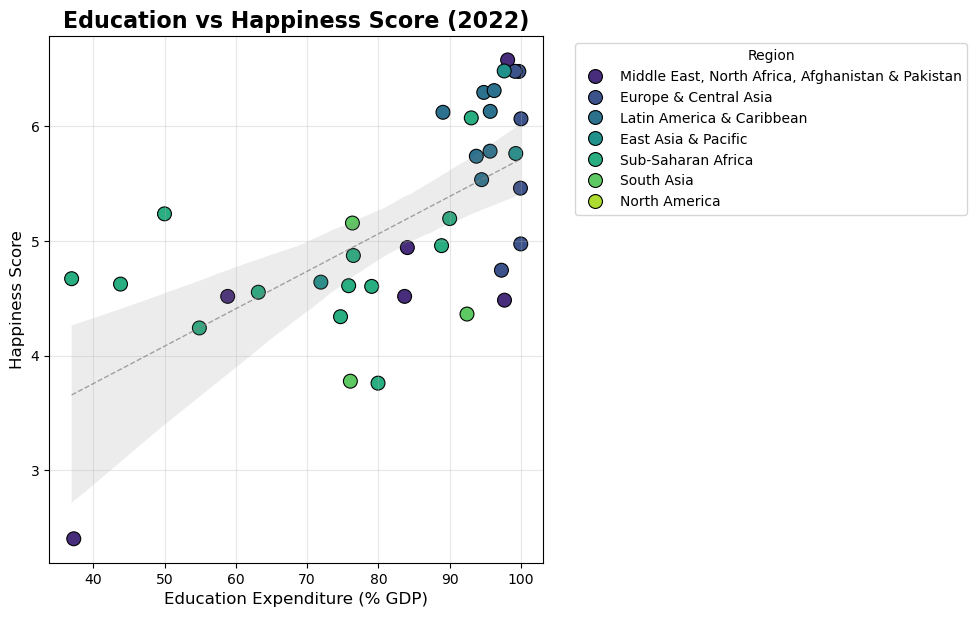

In [11]:
# Filter for 2021 (best recent year for data)
df_edu_2021 = left_wide[left_wide['Year'] == 2021]

# Scatterplot education vs happiness
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_edu_2021, x='Adult Literacy %', y='Happiness Score',
                hue='Region',
                 s=100,
                 palette='viridis',
                 edgecolor='black'
)

# Add a trendline
sns.regplot(
    data=df_edu_2021,
    x='Adult Literacy %',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()


# Titles and labels
plt.title('Education vs Happiness Score (2022)', fontsize=16, weight='bold')
plt.xlabel('Education Expenditure (% GDP)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

📊 Step 5 – Correlation Heatmap -- Purpose: Visually compare how strongly each factor is related to happiness. ✅ Explanation: This gives a snapshot of how strong each relationship is. You’ll likely see all three (GDP, Health, Education) strongly linked to happiness.

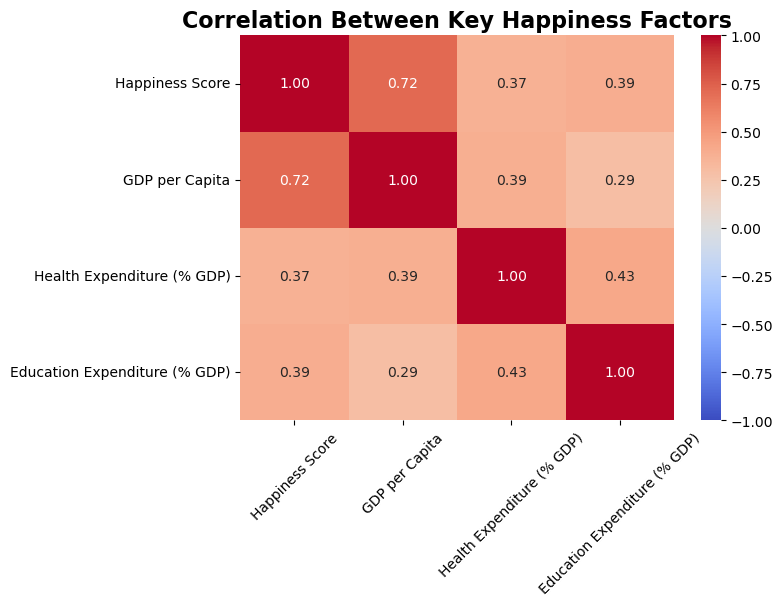

In [12]:
corr = left_wide[['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Titles and labels
plt.title('Correlation Between Key Happiness Factors', fontsize=16, weight='bold')
# plt.xlabel('Happiness Factors', fontsize=12)
# plt.ylabel('Happiness Factors', fontsize=12)
plt.xticks(rotation=45)

plt.show()

🥇 Step 6 – Top vs Bottom Countries Comparison -- Purpose: Show contrast in happiness drivers between the happiest and least happy countries. ✅ Explanation:
Good for storytelling: who’s doing best, who’s struggling, and how big the gap is.

In [13]:
# Metrics to compare
metrics = ['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']

# Average by country
country_means = left_wide.groupby('Country', as_index=False)[metrics].mean()

# Identify top 5 and bottom 5 countries by happiness
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')

# Add a 'Group' label for clarity
top5['Group'] = 'Top 5 Happiest'
bottom5['Group'] = 'Bottom 5 Least Happy'

# Combine
top_bottom = pd.concat([top5, bottom5])

# Melt for multi-metric barplot
top_bottom_melted = top_bottom.melt(id_vars=['Country', 'Group'], 
                                    value_vars=metrics, 
                                    var_name='Metric', 
                                    value_name='Value')

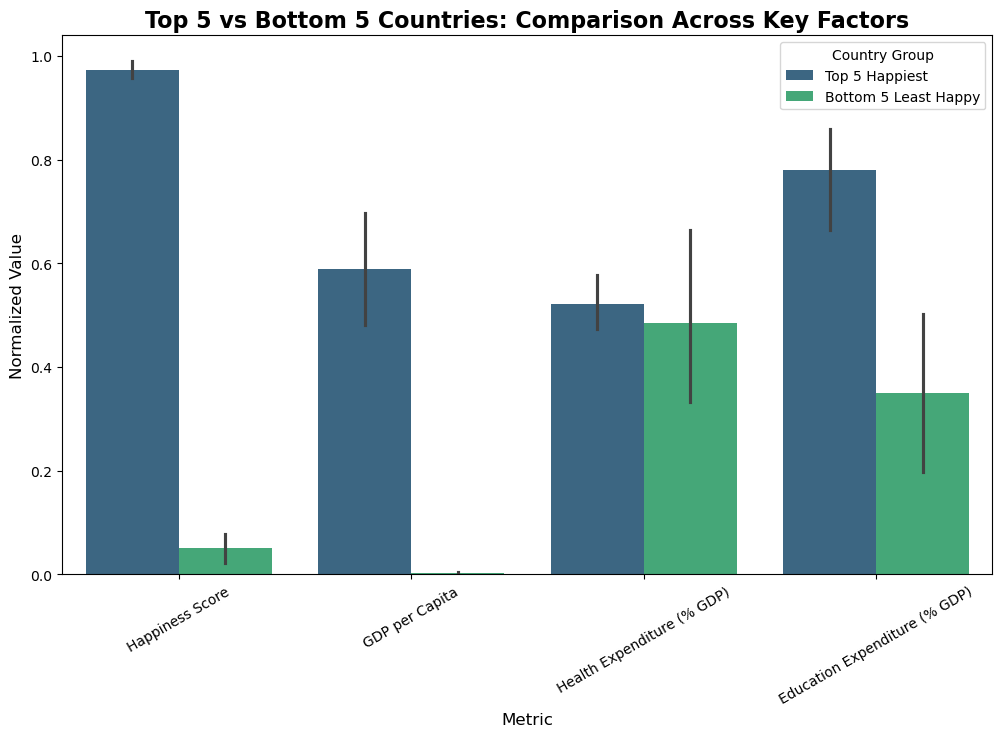

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Step 1: Normalize all metrics
scaler = MinMaxScaler()
country_means[metrics] = scaler.fit_transform(country_means[metrics])

# Step 2: Identify groups and melt as before
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')
top5['Group'] = 'Top 5 Happiest'
bottom5['Group'] = 'Bottom 5 Least Happy'
top_bottom = pd.concat([top5, bottom5])
top_bottom_melted = top_bottom.melt(id_vars=['Country', 'Group'],
                                    value_vars=metrics,
                                    var_name='Metric',
                                    value_name='Value')
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_bottom_melted,
    x='Metric',
    y='Value',
    hue='Group',
    palette='viridis'
)
plt.title('Top 5 vs Bottom 5 Countries: Comparison Across Key Factors', fontsize=16, weight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.legend(title='Country Group')
plt.xticks(rotation=30)
plt.show()


In [15]:
# List of metrics to include
metrics = ['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']

# Average values per country for all metrics
country_means = left_wide.groupby('Country', as_index=False)[metrics].mean()

# Get top 5 and bottom 5 countries by Happiness Score
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')

print("Top 5:\n", top5[['Country', 'Happiness Score']])
print("\nBottom 5:\n", bottom5[['Country', 'Happiness Score']])

Top 5:
          Country  Happiness Score
46       Finland         7.646923
38       Denmark         7.605462
104       Norway         7.462154
59       Iceland         7.460231
130  Switzerland         7.429538

Bottom 5:
                       Country  Happiness Score
0                 Afghanistan         3.078000
124               South Sudan         3.269400
26   Central African Republic         3.314857
22                    Burundi         3.370000
116                    Rwanda         3.510700


C:\Users\Newforce\AppData\Local\Temp\ipykernel_36580\4164092183.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




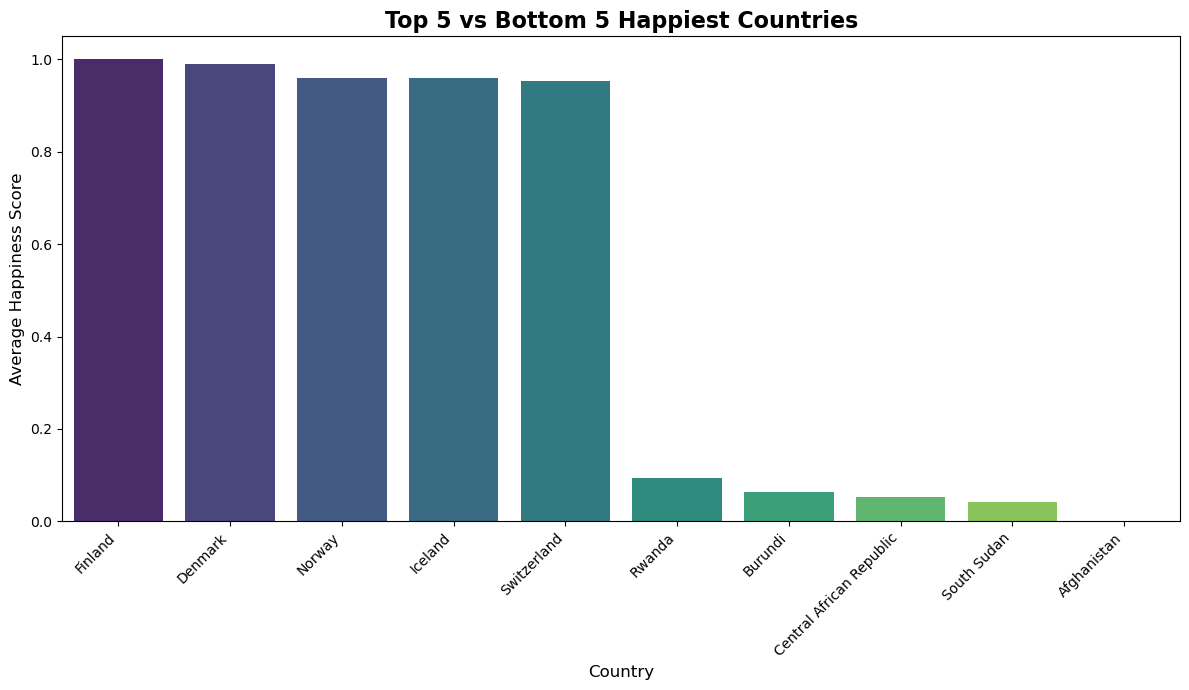

In [16]:
# Combine top and bottom 5
#top_bottom = pd.concat([top5, bottom5])
top_bottom = top_bottom.sort_values('Happiness Score', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_bottom,
    x='Country',
    y='Happiness Score',
    palette='viridis'
)

plt.title('Top 5 vs Bottom 5 Happiest Countries', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

🕸️ Step 7 – Radar (Spider) Chart -- Purpose: Show factor balance between happy and unhappy countries. ✅ Explanation: You’ll see that happy countries have balanced strength in all three areas — unhappy countries are weak across all or most.

C:\Users\Newforce\AppData\Local\Temp\ipykernel_36580\3565780823.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Newforce\AppData\Local\Temp\ipykernel_36580\3565780823.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



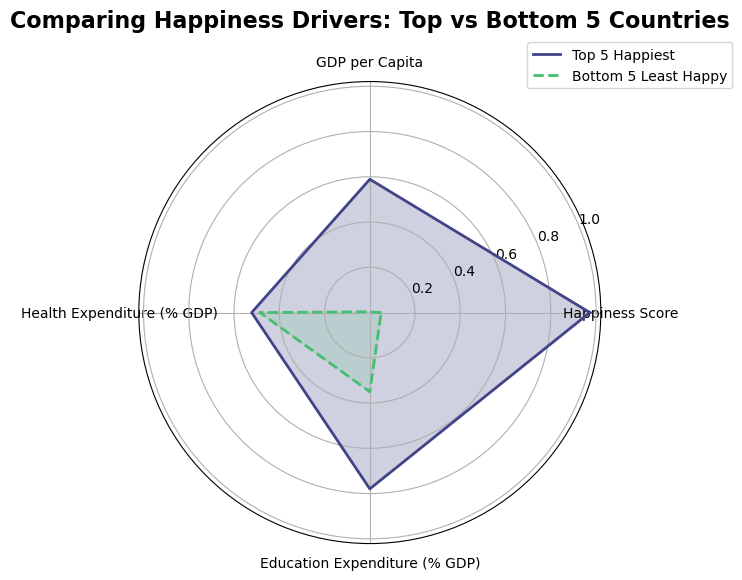

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalize metrics per column across all countries
scaler = MinMaxScaler()
country_means[metrics] = scaler.fit_transform(country_means[metrics])  # Correct normalization

# Select top/bottom groups after normalization
top5 = country_means.nlargest(5, 'Happiness Score')
bottom5 = country_means.nsmallest(5, 'Happiness Score')

# Calculate mean for each group
top_means = top5[metrics].mean()
bottom_means = bottom5[metrics].mean()

# Create DataFrame for radar chart (no second normalization!)
data = pd.DataFrame({'Top 5': top_means, 'Bottom 5': bottom_means})

labels = list(data.index)
top_values = data['Top 5'].tolist() + [data['Top 5'][0]]
bottom_values = data['Bottom 5'].tolist() + [data['Bottom 5'][0]]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist() + [0]

# Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

color_top = plt.cm.viridis(0.2)
color_bottom = plt.cm.viridis(0.7)

ax.plot(angles, top_values, label='Top 5 Happiest', color=color_top, linewidth=2)
ax.fill(angles, top_values, color=color_top, alpha=0.25)
ax.plot(angles, bottom_values, label='Bottom 5 Least Happy', linestyle='dashed', color=color_bottom, linewidth=2)
ax.fill(angles, bottom_values, color=color_bottom, alpha=0.15)

plt.xticks(angles[:-1], labels)
plt.title('Comparing Happiness Drivers: Top vs Bottom 5 Countries', fontsize=16, weight='bold', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

🧠 Step 8 – “What If” Simulation -- Purpose: Predict how happiness might improve if a struggling country improved health or education. ✅ Explanation: This gives your final, story-driven insight — showing how improving life expectancy or education could boost happiness even without big GDP growth.

In [18]:
left_wide_advanced[['Country', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Adult Literacy %', 'Happiness Score']].isna().sum()

Country                         0
GDP per Capita                  4
Health Expenditure (% GDP)    246
Adult Literacy %              602
Happiness Score                 0
dtype: int64

In [19]:
df_model = left_wide_advanced[['Country', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Adult Literacy %', 'Happiness Score']].dropna()

C:\Users\Newforce\AppData\Local\Temp\ipykernel_36580\2067070559.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




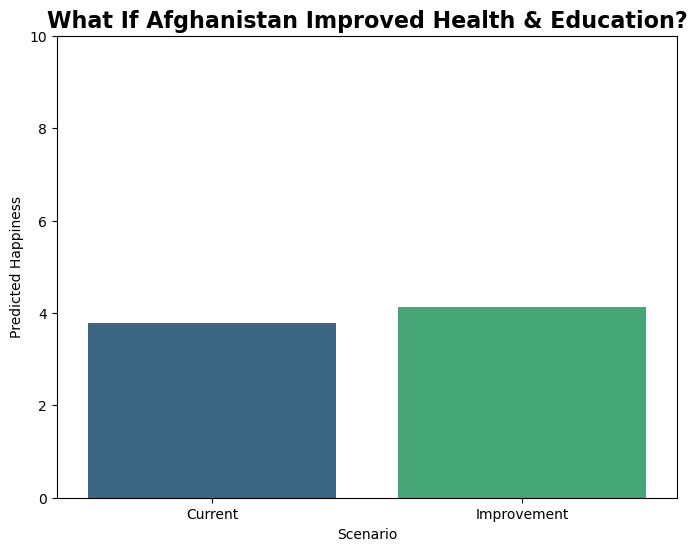

Predicted increase: 0.35 points


In [20]:

X = df_model[['GDP per Capita', 'Health Expenditure (% GDP)', 'Adult Literacy %']]
y = df_model['Happiness Score']

model = LinearRegression().fit(X, y)

# Pick a low-happiness country
country = df_model[df_model['Country'] == 'Afghanistan'].copy()  # Change country name if needed

# Predict current happiness
current_pred = model.predict(country[X.columns])[0]

# Simulate a 50% increase in health and education
country_improved = country.copy()
country_improved['Health Expenditure (% GDP)'] *= 1.50
country_improved['Adult Literacy %'] *= 1.50
improved_pred = model.predict(country_improved[X.columns])[0]

# Plot before/after
before_after = pd.DataFrame({
    'Scenario': ['Current', 'Improvement'],
    'Predicted Happiness': [current_pred, improved_pred]
})

plt.figure(figsize=(8,6))
sns.barplot(data=before_after, x='Scenario', y='Predicted Happiness', palette='viridis')
plt.title(f"What If {country.iloc[0]['Country']} Improved Health & Education?", fontsize=16, weight='bold')
plt.ylim(0, 10)
plt.show()

print(f"Predicted increase: {improved_pred - current_pred:.2f} points")

In [21]:
if len(country) == 0:
    print("Country not found!")
else:
    current_pred = model.predict(country[X.columns])[0]

In [22]:
print(df_model['Country'].unique())

['Afghanistan' 'United Arab Emirates' 'Argentina' 'Armenia' 'Azerbaijan'
 'Burundi' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bahrain' 'Belarus'
 'Bolivia' 'Brazil' 'Central African Republic' 'China' "Cote d'Ivoire"
 'Colombia' 'Comoros' 'Dominican Republic' 'Ecuador' 'Spain' 'Ethiopia'
 'Gabon' 'Georgia' 'Ghana' 'Guatemala' 'Honduras' 'Indonesia' 'India'
 'Iraq' 'Italy' 'Cambodia' 'Kuwait' 'Lebanon' 'Sri Lanka' 'Lesotho'
 'Madagascar' 'Maldives' 'Mexico' 'Myanmar' 'Mongolia' 'Mozambique'
 'Mauritania' 'Mauritius' 'Malawi' 'Malaysia' 'Niger' 'Nigeria' 'Nepal'
 'Pakistan' 'Panama' 'Peru' 'Philippines' 'Paraguay' 'West Bank and Gaza'
 'Romania' 'Russian Federation' 'Rwanda' 'Saudi Arabia' 'Senegal'
 'Singapore' 'Sierra Leone' 'El Salvador' 'Serbia' 'Chad' 'Togo'
 'Thailand' 'Tunisia' 'Turkiye' 'Tanzania' 'Uganda' 'Uruguay' 'Uzbekistan'
 'Viet Nam' 'South Africa' 'Zambia' 'Zimbabwe']


🧩 Step 9 – Optional Finisher: Combined Insights -- Purpose: Summarize all relationships together. ✅ Explanation: This grid of scatterplots shows all pairwise relationships — good for appendix slides or supporting your model insights.

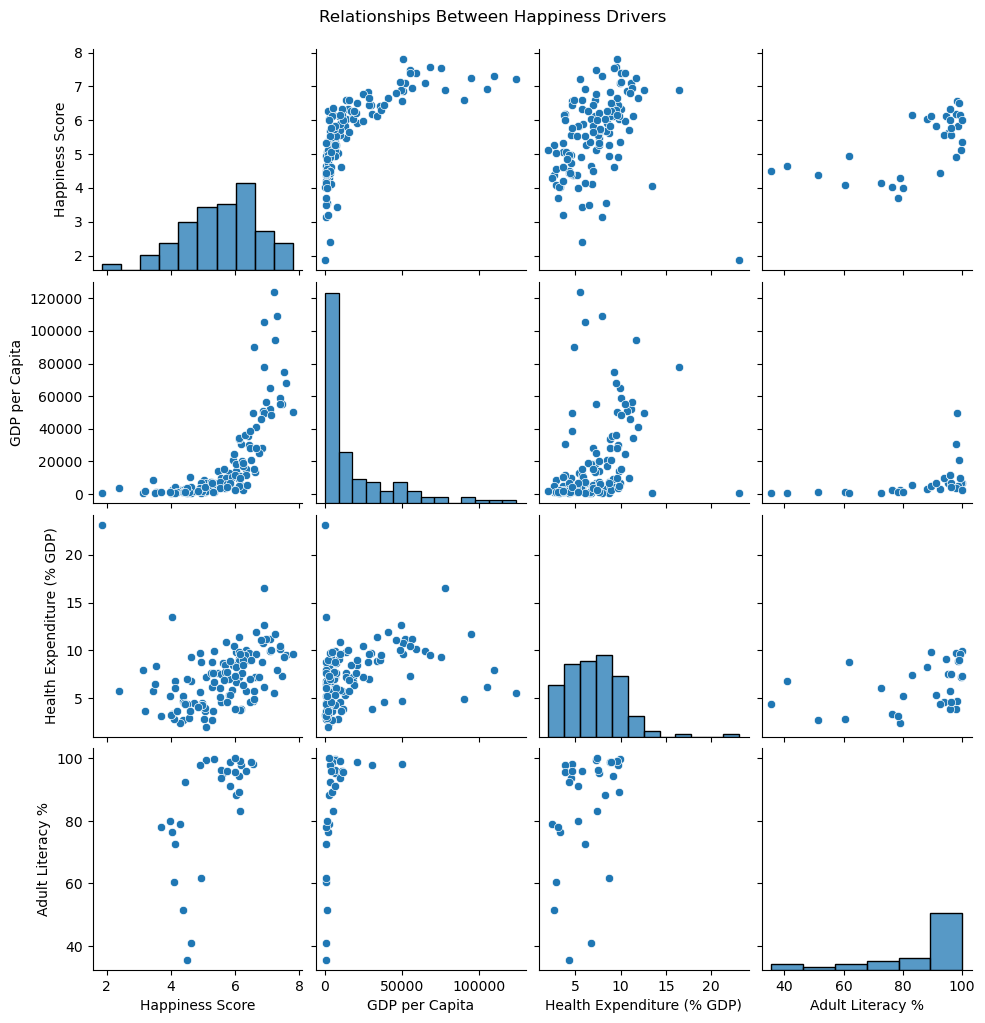

In [23]:
sns.pairplot(df_health_2022[['Happiness Score', 'GDP per Capita', 'Health Expenditure (% GDP)', 'Adult Literacy %']])
plt.suptitle('Relationships Between Happiness Drivers', y=1.02)
plt.show()

Regional happiness trends over time

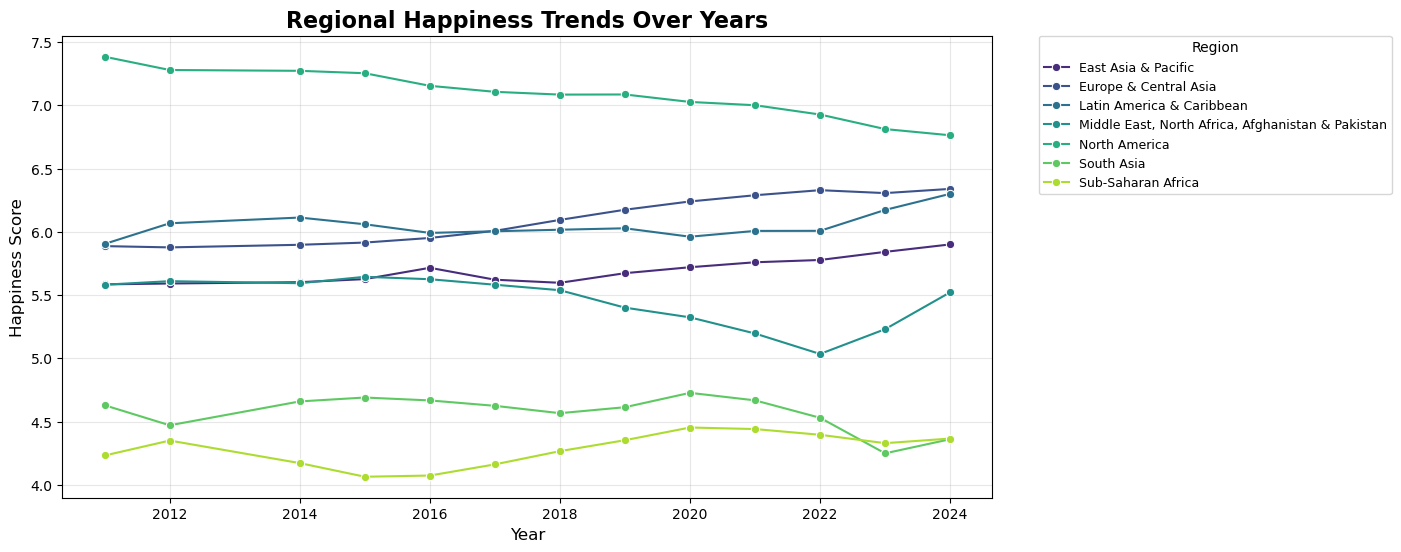

In [24]:
# Average Happiness over years by Region
df_region_year = left_wide.groupby(['Year','Region'])['Happiness Score'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_region_year, x='Year', y='Happiness Score', hue='Region', marker='o', palette='viridis')
plt.title('Regional Happiness Trends Over Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region')

plt.show()

Happiness 2024 (Bar Chart) Regional Avg

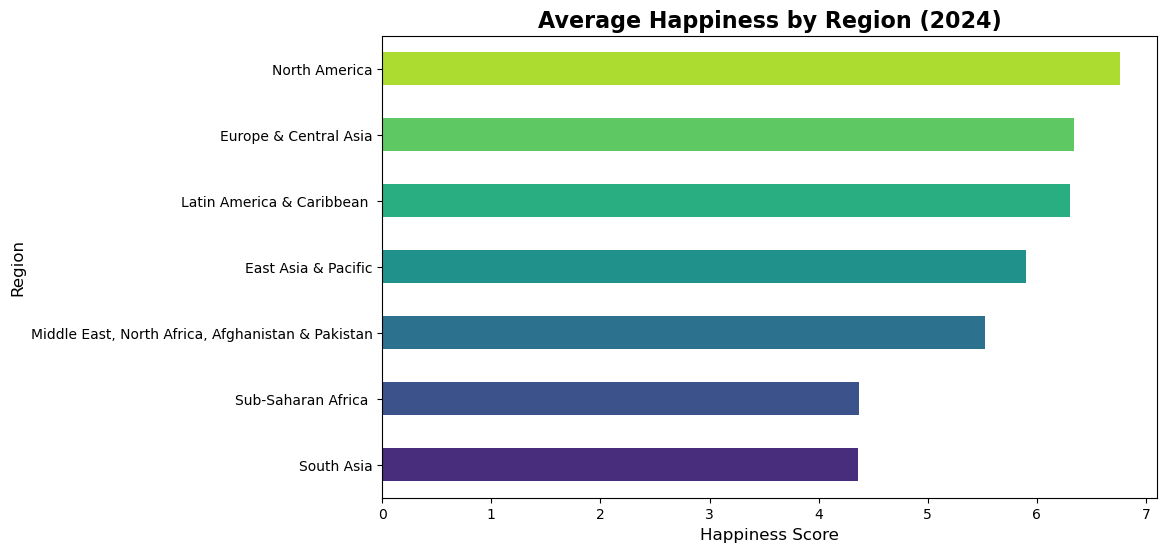

In [25]:
region_avg_happiness = df_gdp_2024.groupby('Region')['Happiness Score'].mean().sort_values()

plt.figure(figsize=(10,6))
#region_avg_happiness.plot(kind='barh', colormap='viridis')
palette = sns.color_palette("viridis", n_colors=len(region_avg_happiness))
region_avg_happiness.plot(kind='barh', color=palette)
plt.title('Average Happiness by Region (2024)', fontsize=16, weight='bold')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Region', fontsize=12)

plt.show()